In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from modules_indicator import *
from modules_alternative import *
import os

In [34]:
def generate_factor(historical_data):
    address = historical_data["activeaddresses"]
    ret = historical_data["return"]
    tweets = historical_data["tweets"]
    difficulty = historical_data["difficulty"]
    num_tran_in_blockchain_per_day = historical_data["transactions"]
    # factor = num_tran_in_blockchain_per_day.rolling(28).corr(ret, method="spearman")
    factor = difficulty.rolling(14).kurt()
    return factor.shift(1)

lookback_days = 5
threshold = 1.0

In [ ]:
# dic_mapping = {
#     "transactions": "Number of transactions in blockchain per day",
#     "size": "Average block size",
#     "sentbyaddress": "Number of unique (from) addresses per day",
#     "difficulty": "Average mining difficulty per day",
#     "hashrate": "Average hashrate (hash/s) per day",
#     "price": "Average price, per day, USD",
#     "mining_profitability": "Mining Profitability",
#     "sentinusd": "Sent coins in USD per day",
#     "transactionfees": "Average transaction fee, USD",
#     "median_transaction_fee": "Median transaction fee, USD",
#     "confirmationtime": "Average block time (minutes)",
#     "marketcap": "Market Capitalization, USD",
#     "transactionvalue": "Avg. Transaction Value, USD",
#     "mediantransactionvalue": "Median Transaction Value, USD",
#     "tweets": "Tweets per day",
#     "google_trends": "Google Trends to \"Bitcoin\" @ 2012-01-01",
#     "activeaddresses": "Number of unique (from or to) addresses per day",
#     "top100cap": "Top 100 Richest Addresses to Total coins %",
#     "fee_to_reward": "Average Fee Percentage in Total Block Reward",
# }

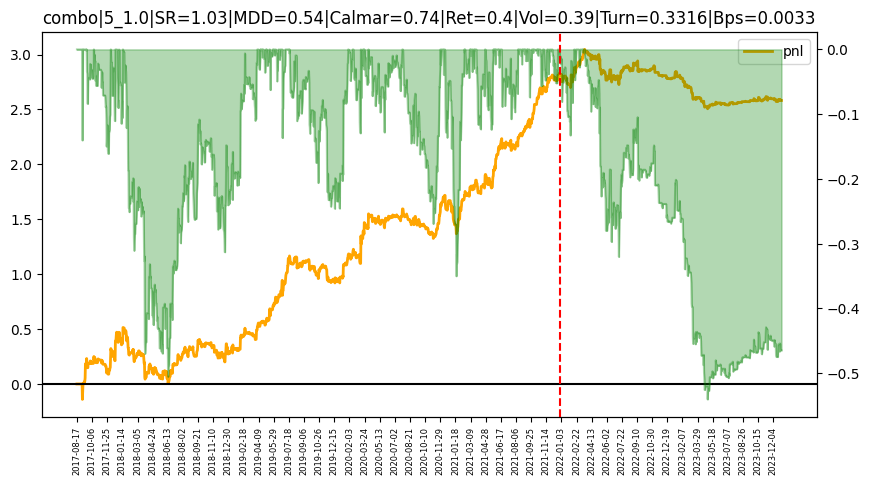

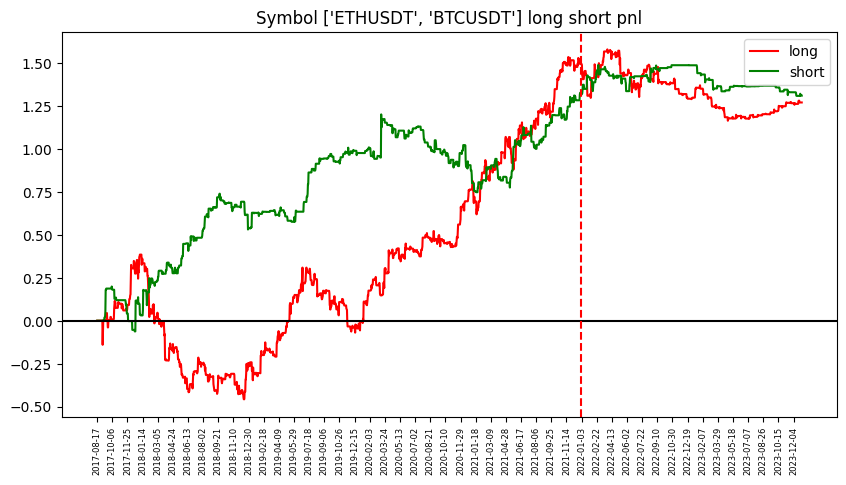

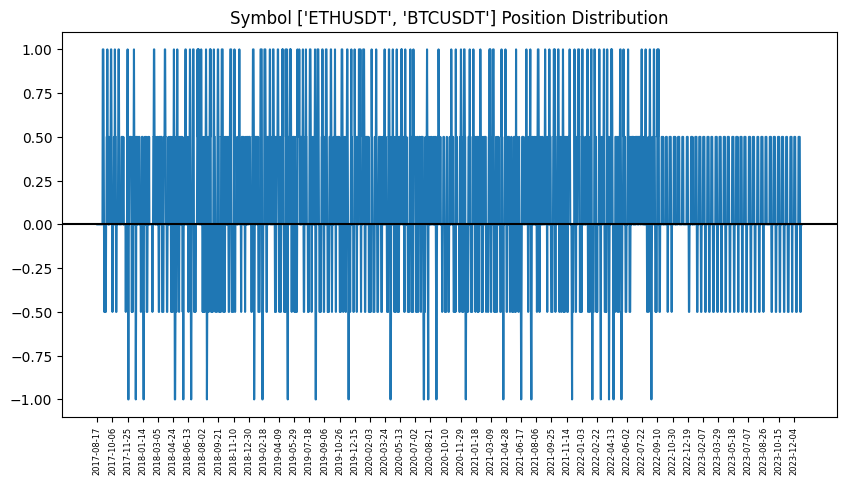

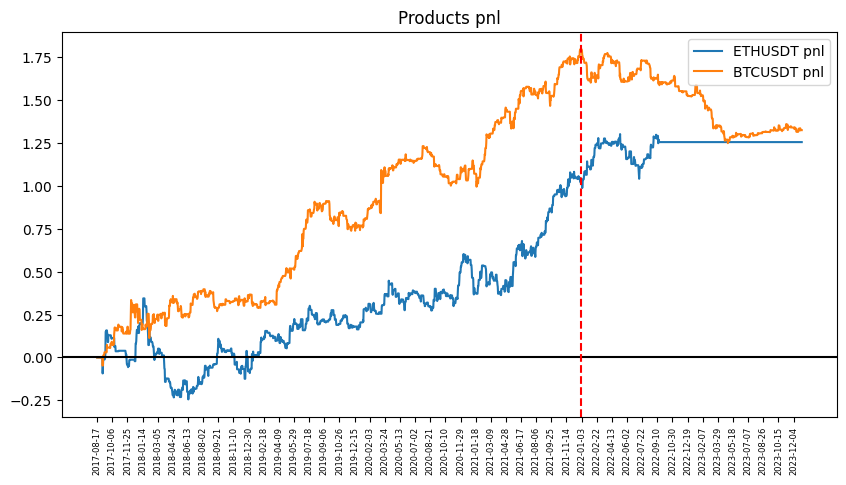

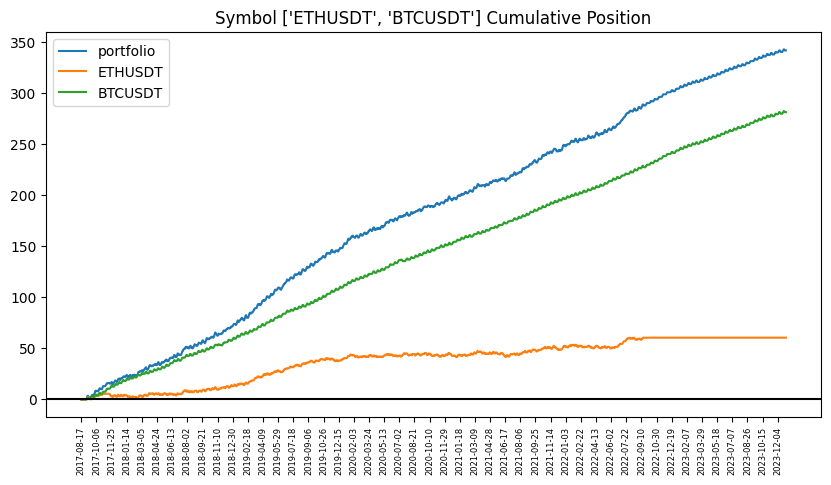

In [36]:
trade_uni = ["ETHUSDT", "BTCUSDT"]
# trade_uni = ["ETHUSDT"]
out = True
alternative_features = ["activeaddresses", "transactions", "difficulty", "fee_to_reward", "tweets", "hashrate",
                        "transactions"]
basic_features = ["open", "high", "low", "close", "volume", "quote_volume", "trades", "taker_base_volume",
                    "taker_quote_volume"]

symbol_data = {}
for symbol in trade_uni:
    symbol_data[symbol] = load_product_feature_matrix(symbol, basic_features, alternative_features, out)
selected_features = ["activeaddresses", "transactions", "difficulty", "fee_to_reward", "tweets", "open", "high",
                        "low", "close", "volume", "quote_volume", "transactions",
                        "trades", "taker_base_volume", "taker_quote_volume", "return", "hashrate"]
historical_data = {}
for feature in selected_features:
    data_lst = []
    for key in symbol_data.keys():
        data = symbol_data[key][feature]
        data.name = key
        data_lst.append(data)
    historical_data[feature] = pd.concat(data_lst, axis=1)
factor = generate_factor(historical_data)


# single
pos = get_timeseries_pos(factor, historical_data["return"], lookback_days=lookback_days, holding_days=1, 
                         threshold=threshold, volatility_adjust=False)
bt_dict = backtest_stats(historical_data["return"], pos, lookback_days=lookback_days, holding_days=1, threshold=threshold, is_long_only=False)

# plot
plot_pnl_general(bt_dict["basecode_return"], bt_dict["pos"], symbol="combo", best_param=f'{lookback_days}_{threshold}')
plot_ls_pnl_general(historical_data["return"], pos, symbol=f'{trade_uni}')
plot_pos_general(pos, symbol=f'{trade_uni}')
plot_product_pnl_general(bt_dict["basecode_return"], interval=50)
plot_cumulative_pos_general(pos, symbol=f'{trade_uni}')

In [19]:
# plot_pnl_general(bt_dict["basecode_return"], pos, symbol=f'{trade_uni}', best_param=f'{lookback_days}_{threshold}')
# plot_ls_pnl_general(historical_data["return"], pos, symbol=f'{trade_uni}')
# plot_product_pnl_general(bt_dict["basecode_return"], pos)
# plot_pos_general(pos, symbol=f'{trade_uni}')
# plot_cumulative_pos_general(pos, symbol=f'{trade_uni}')